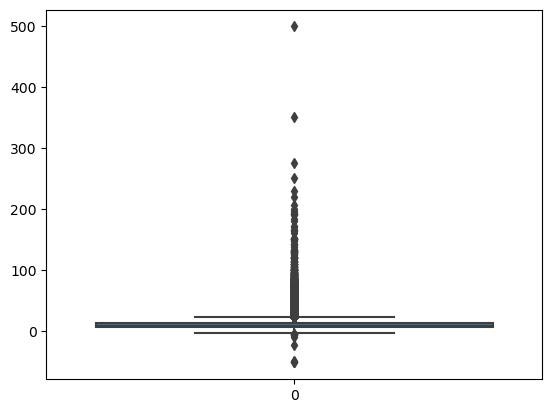

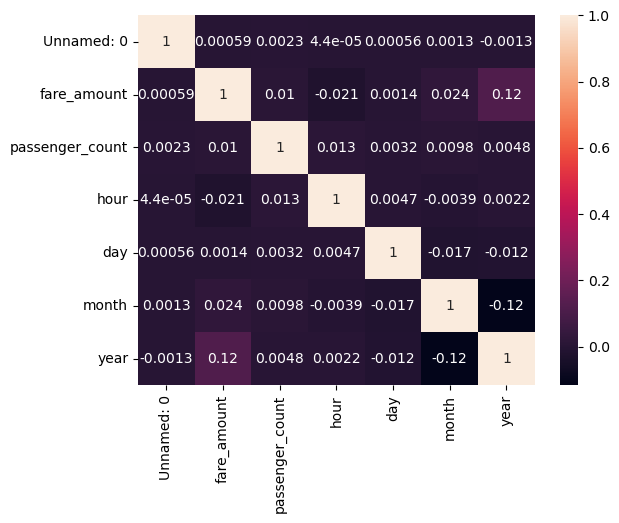

Linear Regression R2: 0.015331092975617078
Linear Regression RMSE: 10.06256987304637
Random Forest R2: -0.06430194529677524
Random Forest RMSE: 10.461554571554132


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("uber.csv")

# Pre-process the data
df = df.dropna()  # Drop missing values
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour  # Extract hour from datetime
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df = df.drop(['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','key'], axis=1) # Drop unnecessary columns, including 'key'

# Identify outliers
sns.boxplot(df['fare_amount'])
plt.show()

# Check correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Split the data
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest Regression Model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the models
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))